# Brain concentration data analysis

### Experiment 2

### 9 Rats total
- 4 Vehicle injections
- 5 Har + DMT injections (3 mg/kg each)

In [1]:
import os
import fnmatch
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")


In [2]:
# Definitions

analysis_path = os.path.dirname(os.getcwd())
path = os.path.dirname(analysis_path)

raw_data_path = f'{path}/raw_data/02_Results_Ratbrain_experiment_2.xlsx'

rat_list = ['Rat{}'.format(x) for x in pd.Index(np.arange(1,10)).astype(str).str.zfill(1)]

In [3]:
df = pd.read_excel(raw_data_path, header = 0, engine = 'openpyxl')
df.pop('Index')
df

,Sample Name,Dilution Factor,Component Name,Calculated Concentration [ng/g]
0,Rat1_Vial01,3.47,3-IAA,62.053
1,Rat1_Vial01,3.47,DMT,NaN
2,Rat1_Vial01,3.47,DMT-N-Oxide,NaN
3,Rat1_Vial01,3.47,NMT,NaN
4,Rat1_Vial01,3.47,Harmine,NaN
...,...,...,...,...
103,Rat9_Vial18,0.81,DMT,1006.061
104,Rat9_Vial18,0.81,DMT-N-Oxide,11.498
105,Rat9_Vial18,0.81,NMT,2.233
106,Rat9_Vial18,0.81,Harmine,295.124


In [4]:
# Insert column treatment_group at position 1
df.insert(loc=1, column='Treatment_Group', value=0)    
df.loc[(df['Sample Name'].str.contains('Rat1')) | (df['Sample Name'].str.contains('Rat2')) | (df['Sample Name'].str.contains('Rat3')) | (df['Sample Name'].str.contains('Rat4')), 'Treatment_Group'] = 'Veh'
df.loc[(df['Sample Name'].str.contains('Rat5')) | (df['Sample Name'].str.contains('Rat6')) | (df['Sample Name'].str.contains('Rat7')) | (df['Sample Name'].str.contains('Rat8')) | (df['Sample Name'].str.contains('Rat9')), 'Treatment_Group'] = 'Har + DMT'

# Insert column treatment_group_# at position 1
df.insert(loc=1, column='Treatment_Group_#', value=0)    
df.loc[(df['Sample Name'].str.contains('Rat1')) | (df['Sample Name'].str.contains('Rat2')) | (df['Sample Name'].str.contains('Rat3')) | (df['Sample Name'].str.contains('Rat4')), 'Treatment_Group_#'] = 1
df.loc[(df['Sample Name'].str.contains('Rat5')) | (df['Sample Name'].str.contains('Rat6')) | (df['Sample Name'].str.contains('Rat7')) | (df['Sample Name'].str.contains('Rat8')) | (df['Sample Name'].str.contains('Rat9')), 'Treatment_Group_#'] = 2

# Insert column with sample number (2 per rat brain)
df.insert(loc=3, column='Sample Number', value=0)
df.loc[(df['Sample Name'].str.contains('Vial01')) | (df['Sample Name'].str.contains('Vial03')) |
       (df['Sample Name'].str.contains('Vial05')) | (df['Sample Name'].str.contains('Vial07')) |
       (df['Sample Name'].str.contains('Vial09')) | (df['Sample Name'].str.contains('Vial11')) |
       (df['Sample Name'].str.contains('Vial13')) | (df['Sample Name'].str.contains('Vial15')) |
       (df['Sample Name'].str.contains('Vial17')),'Sample Number'] = 1  ##sample 1 = Front. Cort.

df.loc[(df['Sample Name'].str.contains('Vial02')) | (df['Sample Name'].str.contains('Vial04')) |
       (df['Sample Name'].str.contains('Vial06')) | (df['Sample Name'].str.contains('Vial08')) |
       (df['Sample Name'].str.contains('Vial10')) | (df['Sample Name'].str.contains('Vial12')) |
       (df['Sample Name'].str.contains('Vial14')) | (df['Sample Name'].str.contains('Vial16')) |
       (df['Sample Name'].str.contains('Vial18')),'Sample Number'] = 2  ##sample 2 = Cerebellum


# N/A = not detected -> set these values to 0
df['Calculated Concentration [ng/g]'] = df['Calculated Concentration [ng/g]'].fillna(0)

df['Calculated Concentration [ng/g]'] = df['Calculated Concentration [ng/g]'].astype(float)

df.to_excel(f'{analysis_path}/01a_Results_exp_2_ratsamples_analysis.xlsx', sheet_name="Rat_brain_with_group", index = False)



In [5]:
df

,Sample Name,Treatment_Group_#,Treatment_Group,Sample Number,Dilution Factor,Component Name,Calculated Concentration [ng/g]
0,Rat1_Vial01,1,Veh,1,3.47,3-IAA,62.053
1,Rat1_Vial01,1,Veh,1,3.47,DMT,0.000
2,Rat1_Vial01,1,Veh,1,3.47,DMT-N-Oxide,0.000
3,Rat1_Vial01,1,Veh,1,3.47,NMT,0.000
4,Rat1_Vial01,1,Veh,1,3.47,Harmine,0.000
...,...,...,...,...,...,...,...
103,Rat9_Vial18,2,Har + DMT,2,0.81,DMT,1006.061
104,Rat9_Vial18,2,Har + DMT,2,0.81,DMT-N-Oxide,11.498
105,Rat9_Vial18,2,Har + DMT,2,0.81,NMT,2.233
106,Rat9_Vial18,2,Har + DMT,2,0.81,Harmine,295.124


## Calculate Statistics 

mean and sd for each group:

Brain has three samples per rat -> first sample belongs to the frontal cortex, second sample to the hippocampus, third to the cerebellum

In [6]:
# Get all the component names

ls_components = df[~df.duplicated('Component Name')]
ls_components = ls_components['Component Name'].tolist()
ls_components

# List groups
ls_group = ['Veh', 'Har + DMT']
ls_group_number = [1, 2]



In [7]:
df[(df['Sample Name'].str.contains('Vial') & (df['Component Name']=='3-IAA') & (df['Sample Number']==1))]


,Sample Name,Treatment_Group_#,Treatment_Group,Sample Number,Dilution Factor,Component Name,Calculated Concentration [ng/g]
0,Rat1_Vial01,1,Veh,1,3.47,3-IAA,62.053
12,Rat2_Vial03,1,Veh,1,1.74,3-IAA,34.892
24,Rat3_Vial05,1,Veh,1,2.80,3-IAA,52.689
36,Rat4_Vial07,1,Veh,1,2.38,3-IAA,46.843
48,Rat5_Vial09,2,Har + DMT,1,2.20,3-IAA,711.810
60,Rat6_Vial11,2,Har + DMT,1,2.07,3-IAA,436.862
72,Rat7_Vial13,2,Har + DMT,1,2.70,3-IAA,703.408
84,Rat8_Vial15,2,Har + DMT,1,2.66,3-IAA,905.847
96,Rat9_Vial17,2,Har + DMT,1,2.65,3-IAA,502.817


In [8]:
## allocate rat to corresponding group based on rat number

def sample_allocation (row):
    if (row['Sample Number']==1):
        return 'Front Cort'
    if (row['Sample Number']==2):
        return 'Cerebellum'

In [9]:
#Sample 
#df.pop('Sample')
df.insert(loc=7, column='Sample', value=df.apply(lambda row: sample_allocation (row), axis=1))
df

df.to_excel(f'{analysis_path}/02_Results_exp_2_concentration_brain.xlsx', index=False)

In [10]:
df_brain = df

df_brain_high = df_brain[(df_brain['Component Name']== 'DMT') | (df_brain['Component Name']== '3-IAA') | (df_brain['Component Name']== 'Harmine')]
df_brain_low = df_brain[(df_brain['Component Name']== 'DMT-N-Oxide') | (df_brain['Component Name']== 'NMT') | (df_brain['Component Name']== 'Harmol')]

df_brain

,Sample Name,Treatment_Group_#,Treatment_Group,Sample Number,Dilution Factor,Component Name,Calculated Concentration [ng/g],Sample
0,Rat1_Vial01,1,Veh,1,3.47,3-IAA,62.053,Front Cort
1,Rat1_Vial01,1,Veh,1,3.47,DMT,0.000,Front Cort
2,Rat1_Vial01,1,Veh,1,3.47,DMT-N-Oxide,0.000,Front Cort
3,Rat1_Vial01,1,Veh,1,3.47,NMT,0.000,Front Cort
4,Rat1_Vial01,1,Veh,1,3.47,Harmine,0.000,Front Cort
...,...,...,...,...,...,...,...,...
103,Rat9_Vial18,2,Har + DMT,2,0.81,DMT,1006.061,Cerebellum
104,Rat9_Vial18,2,Har + DMT,2,0.81,DMT-N-Oxide,11.498,Cerebellum
105,Rat9_Vial18,2,Har + DMT,2,0.81,NMT,2.233,Cerebellum
106,Rat9_Vial18,2,Har + DMT,2,0.81,Harmine,295.124,Cerebellum


In [11]:
ls_group = ['Veh', 'Har + DMT']
sample_loc = ['Front Cort', 'Cerebellum']
molecule = ['3-IAA', '3-IAA', 
            'DMT', 'DMT',
            'DMT-N-Oxide', 'DMT-N-Oxide',
            'NMT', 'NMT',
            'Harmine', 'Harmine',
            'Harmol', 'Harmol']

sample_loc_6 = ['Front Cort', 'Cerebellum',
                'Front Cort', 'Cerebellum',
                'Front Cort', 'Cerebellum',
                'Front Cort', 'Cerebellum',
                'Front Cort', 'Cerebellum',
                'Front Cort', 'Cerebellum',]

In [12]:
##statistical calculations
# mean and sem of all activities per group
stats_of_components = []
mean_har_dmt = []
mean_veh = []

# get rid of outlier value in Veh group and DMT values (check with plot)
df_brain_no_out = df_brain.copy()


#for group in ls_group:
for component in ls_components:
    for sample in sample_loc:
        
        for group in ls_group:
            # old with all groups combined # needs for loop group:
            mean_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 2)
            std_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 2)
            sem_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].sem(), decimals = 2)
            
            stats_of_components_row = pd.DataFrame(data=[group, sample, component, mean_group, std_group, sem_group]).T
            stats_of_components_row.columns = ['Treatment_Group', 'Sample', 'Component Name', 'Concentration', 'STD', 'SEM']

            stats_of_components.append(stats_of_components_row)
            
        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Veh') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Veh') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        veh = f'{mean} ({sd})'
        mean_veh.append(veh)

        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har + DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har + DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        har_dmt = f'{mean} ({sd})'
        mean_har_dmt.append(har_dmt)

stats_of_components = pd.concat(stats_of_components, axis=0)
stats_of_components.to_excel(f'{analysis_path}/03_Results_exp_2_ratsamples_group_means.xlsx', sheet_name="stats", index = False)


### Latex table

In [13]:
df_mean_conc = pd.read_excel(f'{analysis_path}/03_Results_exp_2_ratsamples_group_means.xlsx', header = 0, engine = 'openpyxl')


In [14]:
df_brain_stats = pd.DataFrame([molecule]).T
df_brain_stats.set_axis(['compound'], axis='columns', inplace=True)

df_brain_stats.insert(loc=1, column='region', value=sample_loc_6)
df_brain_stats.insert(loc=2, column='Veh', value=mean_veh)
df_brain_stats.insert(loc=3, column='Har + DMT', value=mean_har_dmt)

df_brain_stats.to_excel(f'{analysis_path}/table/stats_table_exp_2.xlsx', sheet_name="stats", index = False)


/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93714/2059222100.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_brain_stats.set_axis(['compound'], axis='columns', inplace=True)


In [15]:
### for latex table

df_brain_stats_latex = pd.DataFrame([molecule]).T
df_brain_stats_latex.set_axis(['\textbf{compound}'], axis='columns', inplace=True)
df_brain_stats_latex.insert(loc=1, column='\textbf{region}', value=list(map(lambda x: '{' + x +'}',sample_loc_6)))

df_brain_stats_latex.insert(loc=2, column='\textbf{Veh}', value=list(map(lambda x: '{' + x +'}', mean_veh)))
df_brain_stats_latex.insert(loc=3, column='\textbf{Har + DMT}', value=list(map(lambda x: '{' + x +'}', mean_har_dmt)))

#df_brain_stats_latex.drop([4,5,6,7,10,11], inplace = True)

df_brain_stats_latex

/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93714/1276293343.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_brain_stats_latex.set_axis(['\textbf{compound}'], axis='columns', inplace=True)


,\textbf{compound},\textbf{region},\textbf{Veh},\textbf{Har + DMT}
0,3-IAA,{Front Cort},{49.1 (11.4)},{652.1 (186.5)}
1,3-IAA,{Cerebellum},{20.9 (2.1)},{530.7 (129.8)}
2,DMT,{Front Cort},{0.0 (0.0)},{2122.7 (434.2)}
3,DMT,{Cerebellum},{0.0 (0.0)},{1472.7 (369.2)}
4,DMT-N-Oxide,{Front Cort},{0.0 (0.0)},{10.1 (2.4)}
5,DMT-N-Oxide,{Cerebellum},{0.0 (0.0)},{26.9 (11.6)}
6,NMT,{Front Cort},{0.0 (0.0)},{1.9 (0.4)}
7,NMT,{Cerebellum},{0.0 (0.0)},{3.6 (1.3)}
8,Harmine,{Front Cort},{0.0 (0.0)},{435.9 (107.4)}
9,Harmine,{Cerebellum},{0.0 (0.0)},{411.6 (137.8)}


In [16]:
# Write to file
with open(f'{analysis_path}/table/stats_table_exp_2.tbl', "w") as tbl:

    format = "l" + \
        "@{\hskip 12pt}" +\
        7*"S[table-format = 2.2]"



    tbl.write(df_brain_stats_latex.to_latex(index=False,
                      escape=False,
                      column_format=format)
            )

/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93714/257463598.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl.write(df_brain_stats_latex.to_latex(index=False,


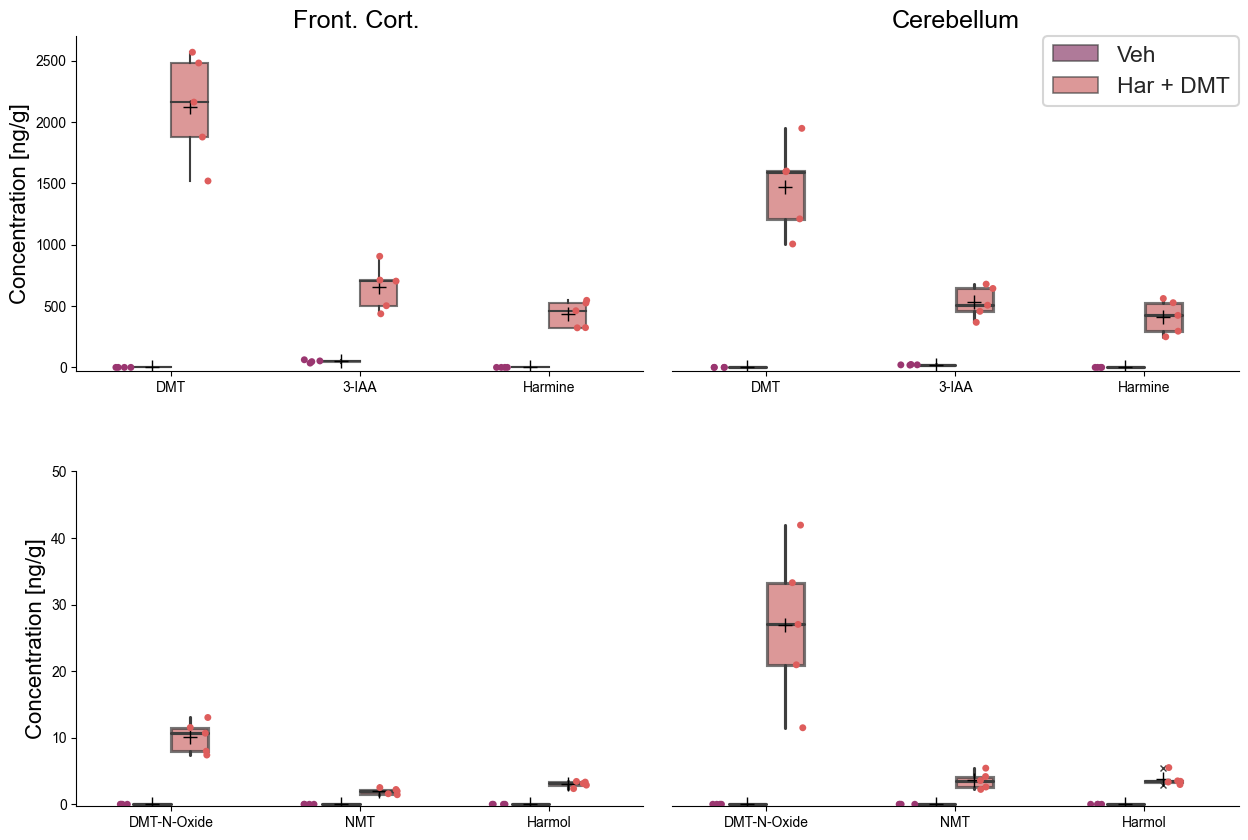

In [17]:
f, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=dict(width_ratios=[1, 1]))
plt.subplots_adjust(hspace = 0.3, wspace = 0.05)

# DMT, 3-IAA, harmine -> front. cortex
g = sns.boxplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_high[df_brain_high['Sample Number']==1], 
                order=['DMT', '3-IAA', 'Harmine'], 
                hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.4, boxprops={'alpha': 0.7}, ax=axs[0,0]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_high[df_brain_high['Sample Number']==1],
              order=['DMT', '3-IAA', 'Harmine'], 
              hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[0,0].get_legend().remove()
axs[0,0].set(ylim=(-30, 2700))


g.set_title('Front. Cort. ')
g.set_ylabel('Concentration [ng/g]', fontsize=16)
g.set_xlabel(None)
g.spines[['right', 'top']].set_visible(False)


# DMT, 3-IAA, harmine -> Cerebellum
g = sns.boxplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_high[df_brain_high['Sample Number']==2], 
                order=['DMT', '3-IAA', 'Harmine'], 
                hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.4, boxprops={'alpha': 0.7}, ax=axs[0,1]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_high[df_brain_high['Sample Number']==2],
              order=['DMT', '3-IAA', 'Harmine'], 
              hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[0,1].get_legend().remove()
axs[0,1].set(ylim=(-30, 2700))


g.set_title('Cerebellum')
g.set_ylabel(None)
g.set_xlabel(None)
g.spines[['right', 'top']].set_visible(False)
g.tick_params(left = False, right = False , labelleft = False) 
                #labelbottom = False, bottom = False)
g.spines[['left', 'right', 'top']].set_visible(False)



# DMT-N-Oxide, NMT, Harmol -> front cortex
g = sns.boxplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_low[df_brain_low['Sample Number']==1], 
                order=['DMT-N-Oxide', 'NMT', 'Harmol'],
                hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.4, boxprops={'alpha': 0.7}, ax=axs[1,0]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_low[df_brain_low['Sample Number']==1],
              order=['DMT-N-Oxide', 'NMT', 'Harmol'],
              hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[1,0].get_legend().remove()
axs[1,0].set(ylim=(-0.3, 50))


#g.set_title('Front. Cort. ')
g.set_ylabel('Concentration [ng/g]', fontsize=16)
g.set_xlabel(None)
g.spines[['right', 'top']].set_visible(False)


# DMT-N-Oxide, NMT, Harmol -> Cerebellum
g = sns.boxplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_low[df_brain_low['Sample Number']==2], 
                order=['DMT-N-Oxide', 'NMT', 'Harmol'],
                hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.4, boxprops={'alpha': 0.7}, ax=axs[1,1]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration [ng/g]', data=df_brain_low[df_brain_low['Sample Number']==2],
              order=['DMT-N-Oxide', 'NMT', 'Harmol'],
              hue='Treatment_Group', hue_order=['Veh', 'Har + DMT'], ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[1,1].get_legend().remove()
axs[1,1].set(ylim=(-0.3, 50))



g.set_ylabel(None)
g.set_xlabel(None)
g.tick_params(left = False, right = False , labelleft = False) 
                #labelbottom = False, bottom = False)
g.spines[['left', 'right', 'top']].set_visible(False)

    
# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.0, 2.3), loc=0, borderaxespad=0.)
for handle in l.legendHandles:
    handle.set_alpha(0.7)    

#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()

fig.set_rasterized(True)
fig.savefig(f'{analysis_path}/plots_for_paper/brain_concentrations_plot_exp_2.eps', dpi=300, format='eps')
fig.savefig(f'{analysis_path}/plots_for_paper/brain_concentrations_exp_2.png')

#order=['DMT-N-Oxide', 'NMT', 'Harmol'],

## Add molecular weights to dataframe

In [18]:
def mol_weights (row):
    if row['Component Name']=='DMT':
        return '188.274'
    if row['Component Name']=='3-IAA':
        return '175.187'
    if row['Component Name']=='NMT':
        return '174.247'
    if row['Component Name']=='DMT-N-Oxide':
        return '204.273'
    if row['Component Name']=='Harmine':
        return '212.25'
    if row['Component Name']=='Harmol':
        return '198.225'



In [19]:
df_brain_molar_conc = df_brain.copy()

df_brain_molar_conc.insert(loc=8, column='mol_weight', value=df_brain_molar_conc.apply(lambda row: mol_weights (row), axis=1))
df_brain_molar_conc.mol_weight = pd.to_numeric(df_brain_molar_conc.mol_weight, errors='coerce')
df_brain_molar_conc['molar_concentration nmol/L'] = 1000*df_brain_molar_conc['Calculated Concentration [ng/g]']/df_brain_molar_conc['mol_weight']

df_brain_molar_conc.to_excel(f'{analysis_path}/02_Results_exp_2_concentration_brain.xlsx', index=False)

In [20]:
treat_group = ['Har + DMT']

## for percentages take molar weights into account: 
# here all is calculated with the molar concentrations


list_total_dmt_front_cort = []
list_dmt_only_front_cort = []
list_IAA_only_front_cort = []
list_NMT_only_front_cort = []
list_NOxide_only_front_cort = []
region_front = ['front cort']#, 'front cort'] #, 'front cort', 'front cort']

list_total_dmt_cerebellum = []
list_dmt_only_cerebellum = []
list_IAA_only_cerebellum = []
list_NMT_only_cerebellum = []
list_NOxide_only_cerebellum = []
region_cereb = ['cerbellum']#, 'cerbellum'] #, 'cerbellum', 'cerbellum']

list_total_dmt_both = []
list_dmt_only_both = []
list_IAA_only_both = []
list_NMT_only_both = []
list_NOxide_only_both = []
region_both = ['average']#, 'both'] #, 'cerbellum', 'cerbellum']

molar_weight_DMT = 188.274 # g/mol
molar_weight_3IAA = 175.187 # g/mol
molar_weight_NMT = 174.247 # g/mol
molar_weight_NOxide = 204.273 # g/mol



for group in treat_group:
    
    ### frontal cortex
    total_dmt_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/5, decimals =2)
    list_total_dmt_front_cort.append(total_dmt_front_cort)
    
    
    dmt_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_front_cort.append(dmt_only_front_cort)
    
    
    IAA_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_front_cort.append(IAA_only_front_cort)
    
    
    NMT_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_front_cort.append(NMT_only_front_cort)
    
    
    NOxide_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_front_cort.append(NOxide_only_front_cort)
    
    
    
    ### cerebellum
    total_dmt_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/5, decimals =2)
    list_total_dmt_cerebellum.append(total_dmt_cerebellum)
    
    
    dmt_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_cerebellum.append(dmt_only_cerebellum)
    
    
    IAA_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_cerebellum.append(IAA_only_cerebellum)
    
    
    NMT_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_cerebellum.append(NMT_only_cerebellum)
    
    
    NOxide_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_cerebellum.append(NOxide_only_cerebellum)
    
    
    ### both regions
    total_dmt_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/10, decimals =2)
    list_total_dmt_both.append(total_dmt_both)
    
    
    dmt_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_both.append(dmt_only_both)
    
    
    IAA_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_both.append(IAA_only_both)
    
    
    NMT_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_both.append(NMT_only_both)
    
    
    NOxide_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_both.append(NOxide_only_both)
    
    
df_mean_front = pd.DataFrame(data=[treat_group, region_front,list_total_dmt_front_cort, 
                                  list_dmt_only_front_cort, 
                                  list_IAA_only_front_cort, 
                                  list_NMT_only_front_cort, 
                                  list_NOxide_only_front_cort]).T 
df_mean_front.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']

df_mean_cereb = pd.DataFrame(data=[treat_group, region_cereb, list_total_dmt_cerebellum, 
                                  list_dmt_only_cerebellum, 
                                  list_IAA_only_cerebellum, 
                                  list_NMT_only_cerebellum, 
                                  list_NOxide_only_cerebellum]).T 
df_mean_cereb.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']

df_mean_both = pd.DataFrame(data=[treat_group, region_both, list_total_dmt_both, 
                                  list_dmt_only_both, 
                                  list_IAA_only_both, 
                                  list_NMT_only_both, 
                                  list_NOxide_only_both]).T 
df_mean_both.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']


df_mean_conc = pd.concat([df_mean_front,df_mean_cereb,df_mean_both], ignore_index = True)


df_mean_conc.insert(loc=7, column ='% DMT', value=np.round((100*df_mean_conc.iloc[:,3].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=8, column ='% 3-IAA', value=np.round((100*df_mean_conc.iloc[:,4].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=9, column ='% NMT', value=np.round((100*df_mean_conc.iloc[:,5].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=10, column ='% DMT-N-Oxide', value=np.round((100*df_mean_conc.iloc[:,6].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))

# calculation of means in µg/L again
df_mean_conc.insert(loc=11, column ='ng/g DMT', value=np.round((molar_weight_DMT*df_mean_conc.iloc[:,3].astype(float)/1000), decimals=1))
df_mean_conc.insert(loc=12, column ='ng/g 3-IAA', value=np.round((molar_weight_3IAA*df_mean_conc.iloc[:,4].astype(float)/1000), decimals=1))
df_mean_conc.insert(loc=13, column ='ng/g NMT', value=np.round((molar_weight_NMT*df_mean_conc.iloc[:,5].astype(float)/1000), decimals=1))
df_mean_conc.insert(loc=14, column ='ng/g DMT-N-Oxide', value=np.round((molar_weight_NOxide*df_mean_conc.iloc[:,6].astype(float)/1000), decimals=1))

In [21]:
df_mean_conc.to_excel(f'{analysis_path}/04_chemistry_table_exp2.xlsx', index=False)